In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# !pip install --upgrade openpyxl

In [43]:
df = pd.read_excel('/Users/macbook/Documents/GitHub/Statistics_with_Python_G7/Dataset/_205a7d5b6310faf94aa3fc51b5fd16ca_OrderList.xlsx')

In [5]:
df.head()

,Order,Region,Age,Total Sale $
0,1000319,South,39,543.95
1,1002323,South,31,253.78
2,1005101,West,35,556.82
3,1008529,East,41,430.50
4,1008768,East,29,552.30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order         3000 non-null   int64  
 1   Region        3000 non-null   object 
 2   Age           3000 non-null   int64  
 3   Total Sale $  3000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 93.9+ KB


In [13]:
df.duplicated(subset='Order').sum()

0

In [ ]:
df.duplicated(subset='Order').sum()

In [15]:
df['Order'].duplicated().sum()

0

In [17]:
df['Order'].nunique()

3000

In [23]:
a = 343.3342431452354543

In [25]:
round(a, 3)

343.334

In [21]:
round(df['Total Sale $'].describe(), 2)

count    3000.00
mean      476.69
std       120.27
min         0.22
25%       400.80
50%       479.50
75%       552.81
max       938.31
Name: Total Sale $, dtype: float64

### 2. The median of "Total Sale $" is larger than the mean. By how much? Round to 2 decimal places.


In [19]:
df['Total Sale $'].median()-df['Total Sale $'].mean()

2.8144133333333343

### 3. What is the standard deviation of Total Sale? Round to 2 decimal places.

In [29]:
df['Total Sale $'].std()

120.2674590181762

### 4. What percentage of orders fell within the interquartile range of Total Sale?



In [ ]:
50%

In [ ]:
sns.palettes.SEABORN_PALETTES

In [35]:
df['Total Sale $'].describe()

count    3000.000000
mean      476.690587
std       120.267459
min         0.220000
25%       400.795000
50%       479.505000
75%       552.805000
max       938.310000
Name: Total Sale $, dtype: float64

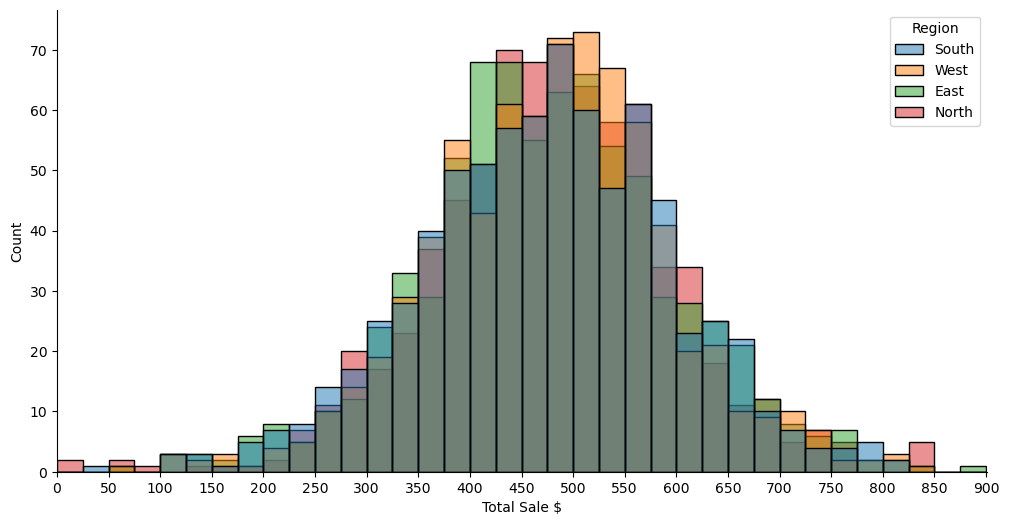

In [33]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.histplot(x = df['Total Sale $'], hue = df['Region'],
             
             bins = np.arange(0, 901, 25),)
ax.set_xticks(np.arange(0, 901, 50))
ax.set_xlim(0, 901)
sns.despine()

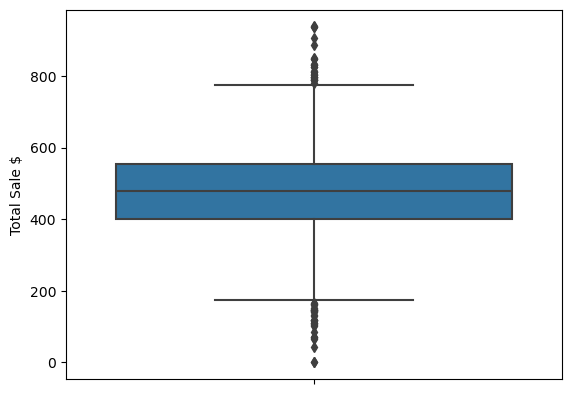

In [39]:
sns.boxplot(y = df['Total Sale $']);

#### 5. Given the limited information you have, your boss wants you to group customers in a meaningful way. You decide to take a look at how the order region impacts things. Calculate the average total sales from the North region only. What is the difference between the North region average total sales and the average total sales across all regions (including the North)? Round to 2 decimal places.

In [ ]:
df['Total Sale $']

In [59]:
round(df[df['Region']=='North']['Total Sale $'].mean() - df['Total Sale $'].mean(), 2)

1.44

In [79]:
df[df['Region']=='North']['Region']

5       North
7       North
10      North
13      North
14      North
        ...  
2988    North
2989    North
2994    North
2995    North
2997    North
Name: Region, Length: 744, dtype: object

In [73]:
[2, 3,4, 5]*2

[2, 3, 4, 5, 2, 3, 4, 5]

In [75]:
df['Region']=='North'

0       False
1       False
2       False
3       False
4       False
        ...  
2995     True
2996    False
2997     True
2998    False
2999    False
Name: Region, Length: 3000, dtype: bool

In [ ]:
df.groupby(df['Region']=='North')['Total Sale $'].mean()

In [67]:
df.groupby(df['Region'])['Total Sale $'].mean()- df['Total Sale $'].mean()

Region
East    -0.676838
North    1.443365
South   -2.367095
West     1.646541
Name: Total Sale $, dtype: float64

In [81]:
df.groupby(df['Region'])['Total Sale $'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East,755.0,476.013748,124.851016,72.31,402.61,473.050,551.9550,935.69
North,744.0,478.133952,116.507786,0.22,408.69,478.925,552.3125,848.93
South,756.0,474.323492,123.661023,43.45,392.42,478.035,559.5875,937.20
West,745.0,478.337128,115.853308,67.19,401.73,483.530,549.5800,938.31


#### 6. What is the absolute value of difference between the North region median total sales and all orders median total sales (across all regions including the North)?


In [99]:
abs(df[df['Region']=='North']['Total Sale $'].median()-df['Total Sale $'].median())

0.5799999999999841

#### 7. Next, take a look at customer age. Create 3 age groups: 21-30, 31-40, 41-50. What is the average total sales for the age group with the highest average? Round to 2 decimal places.

In [83]:
df['Age'].describe()

count    3000.000000
mean       35.416333
std         8.675603
min        21.000000
25%        28.000000
50%        35.000000
75%        43.000000
max        50.000000
Name: Age, dtype: float64

In [87]:
age_21_30 = df[(df['Age']>=21) & (df['Age']<=30)]
age_31_40 = df[(df['Age']>=31) & (df['Age']<=40)]
age_41_50 = df[(df['Age']>=41) & (df['Age']<=50)]

In [93]:
print(age_21_30['Total Sale $'].mean())
print(age_31_40['Total Sale $'].mean())
print(age_41_50['Total Sale $'].mean())

494.62254
459.09028
476.35894


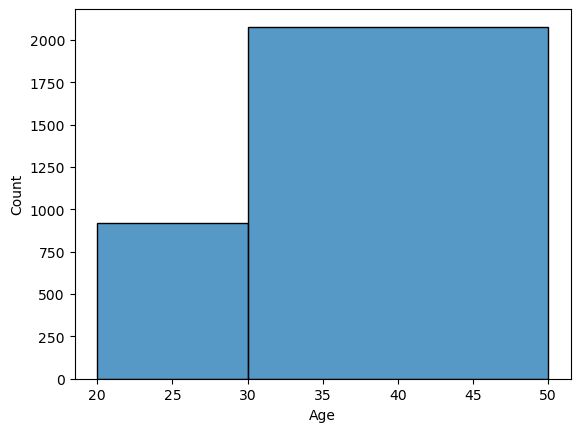

In [107]:
sns.histplot(x = df['Age'], bins = [20, 30, 50, ]);


In [121]:
np.arange(20,51  , 5)

array([20, 25, 30, 35, 40, 45, 50])

In [129]:
age_31_40.shape[0]

1000

In [127]:
age_21_30.shape[0]

1000

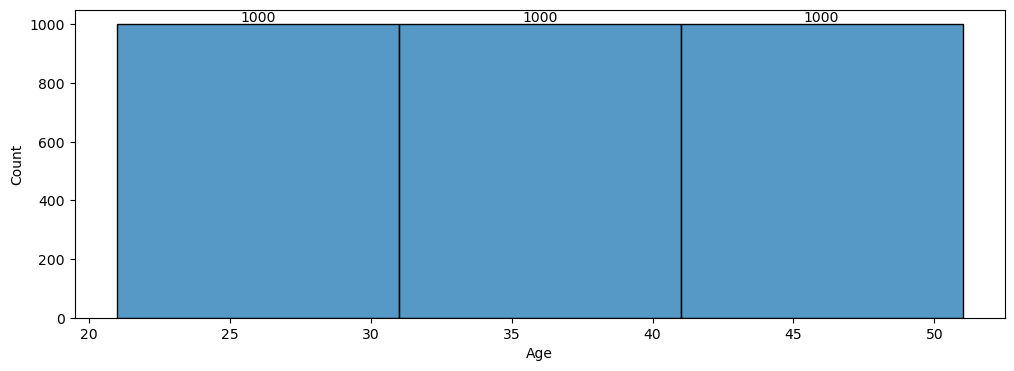

In [135]:
fig, ax = plt.subplots(figsize = (12, 4))
sns.histplot(x = df['Age'], bins = np.arange(21,52, 10));
ax.bar_label(ax.containers[1]);

In [141]:
df['Age']

0       39
1       31
2       35
3       41
4       29
        ..
2995    41
2996    42
2997    23
2998    24
2999    31
Name: Age, Length: 3000, dtype: int64

In [159]:
df['age_group'] = pd.cut(df['Age'], bins = np.arange(20,52, 10),
       labels =['21-30', '31-40', '41-50'] )

In [165]:
df

,Order,Region,Age,Total Sale $,age_group
0,1000319,South,39,543.95,31-40
1,1002323,South,31,253.78,31-40
2,1005101,West,35,556.82,31-40
3,1008529,East,41,430.50,41-50
4,1008768,East,29,552.30,21-30
...,...,...,...,...,...
2995,9986453,North,41,295.27,41-50
2996,9987889,West,42,671.26,41-50
2997,9988584,North,23,624.41,21-30
2998,9992389,West,24,743.35,21-30


In [163]:
df.groupby(df['age_group'])['Total Sale $'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
21-30,1000.0,494.62254,110.598146,267.98,413.6625,479.265,561.4200,938.31
31-40,1000.0,459.09028,104.344349,0.22,403.1775,479.820,538.4575,675.09
41-50,1000.0,476.35894,140.249711,1.38,386.1750,479.065,571.3400,937.20


In [ ]:
pd.cut(df['Age'], bins = [20, 30, 40, 50 ], labels = ['21-30', '31-40', '41-50']).value_counts()

In [ ]:
age_21_30 = df[(df['Age']>=21) & (df['Age']<=30)]
age_31_40 = df[(df['Age']>=31) & (df['Age']<=40)]
age_41_50 = df[(df['Age']>=41) & (df['Age']<=50)]

In [ ]:
df_East = df[df['Region']=='East']
df_North = df[df['Region']=='North']
df_South = [df['Region']=='South']
df_West = df[df['Region']=='West']

In [ ]:
def categorize_age(age):
    if 21 <= age <= 30:
        return '21-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    else:
        return np.nan

# Create the 'age_group' column using apply
df['age_group1'] = df['Age'].apply(categorize_age)

In [ ]:
df

In [ ]:
df.groupby(df['age_group1'])['Total Sale $'].describe()

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.histplot(x = df['Total Sale $'], hue = df['age_group1'],
             palette = ["#FF6347", "#4682B4", "#32CD32", "#FFD700"], 
             bins = np.arange(0, 901, 25),)
ax.set_xticks(np.arange(0, 901, 50))
ax.set_xlim(0, 901)
for i in ax.containers:
    ax.bar_label(i)
# ax.bar_label(ax.containers[1])
sns.despine()